prozheye machine learning( infant diagnosis )-- Seyedeh sahar fatemi abhari--shomare daneshjui: 985141058
raveshe KNN ( infant diagnosis )

In [565]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import jaccard_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline


In [566]:
data=pd.read_csv("C:\\Users\\Sahar\\Downloads\\yadgiri  mashin\\soale prozhe\\Infant_Diagnosis eslah shode.csv")
data.head()
print(data)

    Season   Age   diseases  accident  surgical  fevers  alcohol  smoking  \
0    -0.33  0.69          0         1         1       0      0.8        0   
1    -0.33  0.94          1         0         1       0      0.8        1   
2    -0.33  0.50          1         0         0       0      1.0       -1   
3    -0.33  0.75          0         1         1       0      1.0       -1   
4    -0.33  0.67          1         1         0       0      0.8       -1   
..     ...   ...        ...       ...       ...     ...      ...      ...   
95   -1.00  0.67          1         0         0       0      1.0       -1   
96   -1.00  0.61          1         0         0       0      0.8        0   
97   -1.00  0.67          1         1         1       0      1.0       -1   
98   -1.00  0.64          1         0         1       0      1.0        0   
99   -1.00  0.69          0         1         1       0      0.6       -1   

    sitting diagnosis  
0      0.88         N  
1      0.31         O  
2  

In [567]:
data.columns
data.head(100)

,Season,Age,diseases,accident,surgical,fevers,alcohol,smoking,sitting,diagnosis
0,-0.33,0.69,0,1,1,0,0.8,0,0.88,N
1,-0.33,0.94,1,0,1,0,0.8,1,0.31,O
2,-0.33,0.50,1,0,0,0,1.0,-1,0.50,N
3,-0.33,0.75,0,1,1,0,1.0,-1,0.38,N
4,-0.33,0.67,1,1,0,0,0.8,-1,0.50,O
...,...,...,...,...,...,...,...,...,...,...
95,-1.00,0.67,1,0,0,0,1.0,-1,0.50,N
96,-1.00,0.61,1,0,0,0,0.8,0,0.50,N
97,-1.00,0.67,1,1,1,0,1.0,-1,0.31,N
98,-1.00,0.64,1,0,1,0,1.0,0,0.19,N


In [568]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Season     100 non-null    float64
 1   Age        100 non-null    float64
 2    diseases  100 non-null    int64  
 3   accident   100 non-null    int64  
 4   surgical   100 non-null    int64  
 5   fevers     100 non-null    int64  
 6   alcohol    100 non-null    float64
 7   smoking    100 non-null    int64  
 8   sitting    100 non-null    float64
 9   diagnosis  100 non-null    object 
dtypes: float64(4), int64(5), object(1)
memory usage: 7.9+ KB


In [569]:

cleanup_nums = {"diagnosis": {"N": 0, "O": 1}}
#replace words with numbers
data = data.replace(cleanup_nums)
data.head(100)
##############    normal ra 0 darnazar gereftim va altered ra 1.

,Season,Age,diseases,accident,surgical,fevers,alcohol,smoking,sitting,diagnosis
0,-0.33,0.69,0,1,1,0,0.8,0,0.88,0
1,-0.33,0.94,1,0,1,0,0.8,1,0.31,1
2,-0.33,0.50,1,0,0,0,1.0,-1,0.50,0
3,-0.33,0.75,0,1,1,0,1.0,-1,0.38,0
4,-0.33,0.67,1,1,0,0,0.8,-1,0.50,1
...,...,...,...,...,...,...,...,...,...,...
95,-1.00,0.67,1,0,0,0,1.0,-1,0.50,0
96,-1.00,0.61,1,0,0,0,0.8,0,0.50,0
97,-1.00,0.67,1,1,1,0,1.0,-1,0.31,0
98,-1.00,0.64,1,0,1,0,1.0,0,0.19,0


In [570]:
#spliting data
X=data.iloc[:, 0:9]
#dar x sutun akhar ra shamel nemishavad va hame radif ha shamel mishavad.
y=data.iloc[:, 9]
#dar y faghat sutune natije ra niaz darim pas khod 9 ra minevisim
X_train, X_test, y_train, y_test, =train_test_split(X, y, random_state=0, test_size=0.2)

In [571]:
# baraye har algorithmy ke fasele ra mohasebe mikonad feature minevisim
#feature scaling 
sc_X=StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.transform(X_test)

In [572]:
len(y)

100

In [573]:
len(X_test)

20

In [574]:
import math 
math.sqrt(len(y_test))

4.47213595499958

adade be dast amade baraye len test y zoj umad(4) va ma nemikhaym ta anjayi ke emkan darad neighbor ha zoj bashand va bayad fard

bashe fard behtar va entekhab ma asantar hatesh.baraye hamin dar edame mikhahim eslahesh konim va n_neighbors ra bejaye 4 , 3 

migirim.

In [575]:
# inja N_neighbors hamun k hastesh
#va p hamun power parametr baraye tayin metric estefade shode ast ke hamun euclidean ya fasele noghat az ham hastesh.
#Define the model: Init K-NN
classifier = KNeighborsClassifier(n_neighbors=3, p=2, metric='euclidean')       
#p=2 migirim chon halate khuruji be 2 surate normal(N) va altered(O) hastesh.
# euclidean baraye andazegiri distance hastesh.
#Ehtemalan k=3 kamtarin accuracy ra dashte bashad.



In [576]:
#fit model
classifier.fit(X_train , y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

In [577]:
#predict the test set results
y_pred=classifier.predict(X_test)
y_pred
#100*0.2= 20 tedade adad haye array khahad bud

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0],
      dtype=int64)

In [578]:
# az confusion matrix baraye arzyabi model estefade mikonim.
#Evaluate model
CM=confusion_matrix(y_test , y_pred)
print(CM)

[[15  3]
 [ 2  0]]


ofoghi prediction va amudi actual hastesh ghotre matris mohem hastesh adad 0 yani 0 nafar altered hastand  va 15 nafar daghighan

(correct) normal hastand va adade 3(incorrect) hastesh

In [579]:
f1 = f1_score(y_test, y_pred, average='weighted') 
print('f1 score :',f1)
##
jacard = jaccard_score(y_test, y_pred,pos_label=0)
print('jacard score :',jacard)

f1 score : 0.7714285714285714
jacard score : 0.75


In [580]:

print(accuracy_score(y_test , y_pred))

0.75


Text(42.0, 0.5, 'Truth')

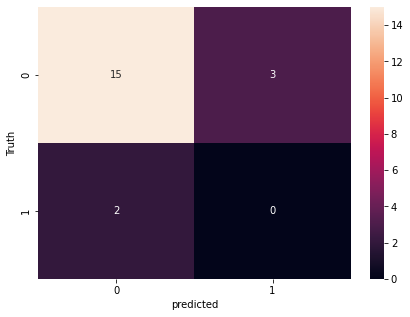

In [581]:
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(CM,annot=True)
plt.xlabel('predicted')
plt.ylabel('Truth')

harchizi ruye ghotr(daraye rang sefid va siyah) natije  correct ma hastesh

majmu adad ha 20 ast ke haman len(X_test) hastesh.20 adad sample.


in shekl neshan midahad faghat 5 incorrect darim va 15 correct darim baraye k=3.


neshan midahad 0 bar altered shodan nozadha dar in bazei ke entekhab kardim va 15 bar normal darumadan(meghdare correct).

agar hamin karhara bejaye k=3 baraye k=9 masalan anjam bedim be surate zir khahad bud.

In [582]:
classifier = KNeighborsClassifier(n_neighbors=9, p=2, metric='euclidean') 

In [583]:
#fit model
classifier.fit(X_train , y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=9)

In [584]:
#predict the test set results
y_pred=classifier.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [585]:
CM=confusion_matrix(y_test , y_pred)
print(CM)

[[18  0]
 [ 2  0]]


18 dade dorost va 2 dade incorrect khahim dasht

In [586]:
f1 = f1_score(y_test, y_pred, average='weighted') 
print('f1 score :',f1)
##
jacard = jaccard_score(y_test, y_pred,pos_label=0)
print('jacard score :',jacard)

f1 score : 0.8526315789473685
jacard score : 0.9


In [587]:
print(accuracy_score(y_test , y_pred))

0.9


accuracy bala mire chon 18 correct prediction darim va 2 incorrect darim.

Text(42.0, 0.5, 'Truth')

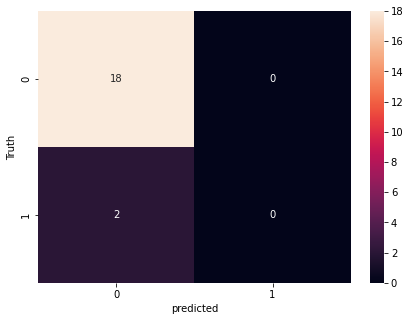

In [588]:
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(CM,annot=True)
plt.xlabel('predicted')
plt.ylabel('Truth')

baraye k=9         18 nafar nozade normal(correct) va 0 nafar altered(correct).

agar hamin karhara bejaye k=9 baraye k=1 masalan anjam bedim be surate zir khahad bud.

In [589]:
classifier = KNeighborsClassifier(n_neighbors=1, p=2, metric='euclidean') 

In [590]:
#fit model
classifier.fit(X_train , y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=1)

In [591]:
#predict the test set results
y_pred=classifier.predict(X_test)
y_pred

array([1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0],
      dtype=int64)

In [592]:
CM=confusion_matrix(y_test , y_pred)
print(CM)
#baraye k=1

[[15  3]
 [ 0  2]]


yani 15 nafar normal(correct) darim va 2 nafar nozad altered(correct) darim. va 3 incorrect.

In [593]:
f1 = f1_score(y_test, y_pred, average='weighted') 
print('f1 score :',f1)
##
jacard = jaccard_score(y_test, y_pred,pos_label=0)
print('jacard score :',jacard)

f1 score : 0.8753246753246753
jacard score : 0.8333333333333334


In [595]:
print(accuracy_score(y_test , y_pred))
#for k=1

0.85


accuracy pain mire chon 17 correct prediction darim va 3 incorrect darim.

<Figure size 576x360 with 0 Axes>

<Figure size 576x360 with 0 Axes>

<Figure size 576x360 with 0 Axes>

<Figure size 576x360 with 0 Axes>

<Figure size 576x360 with 0 Axes>

<Figure size 576x360 with 0 Axes>

<Figure size 576x360 with 0 Axes>

<Figure size 576x360 with 0 Axes>

<Figure size 576x360 with 0 Axes>

<Figure size 576x360 with 0 Axes>

<Figure size 576x360 with 0 Axes>

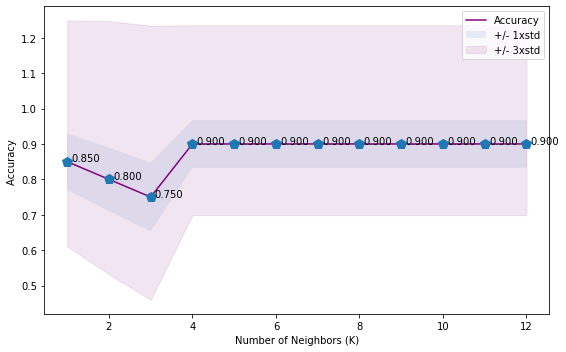

In [596]:

#rasm numudar tedad k ha va accuracy
lu = 13
mean_acc = np.zeros((lu-1))
std_acc = np.zeros((lu-1))
for n in range(1,lu):  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    y_pred=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, y_pred)
    
    std_acc[n-1]=np.std(y_pred==y_test)/np.sqrt(y_pred.shape[0])
    plt.figure(figsize=(8,5))

plt.plot(range(1,lu),mean_acc,'purple')


plt.fill_between(range(1,lu),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,lu),mean_acc -3 * std_acc,mean_acc + 5 * std_acc, alpha=0.10,color="purple")
plt.legend(['Accuracy', '+/- 1xstd', '+/- 3xstd'])
plt.plot(range(1,lu),mean_acc,'p',markersize=11)
for i in range(1,lu) :
    plt.text(i+0.1,mean_acc[i-1],f'{(mean_acc[i-1]):.3f}')
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

hamuntor ke dar numudar mibinim accuracy bad az k>=4 ruye 0.9 sabet baghi mimanad
va accuracy baraye k=3 kamtarin va mosavi 0.75 hastesh. 
pas baraye dashtan accuracy bala bayad k ma 4 ya bishtar az 4 bashad.
raveshe entekhabi KNN va tozihate digar dar edameye code ha dar bala neveshte shodeand.

The end.


Ba tashakor az zahamat shoma ostad gerami.